# KIA 10 Y
- period
    - 2009-03-23 ~ 2018-05-30
- features
    - ['k', 'fitN', 'a0', 'a1', 'b0', 'tau']

## Load data

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
!pip install finance-datareader
import FinanceDataReader as fdr

In [60]:
def strToDate(tt):
    return pd.to_datetime(tt, yearfirst=True)

def strToTimeDelta(tt):
    return pd.Timedelta(float(tt), unit='S')

In [61]:
# read features from text file
# 날짜    k    fitting수    <a0>    <a1>    <b0>    <τ>
filename = 'action(1+1)Param_04'
labels = ['date','k','fitN','a0','a1','b0','tau']
df = pd.read_csv(filename, sep='\t', 
                 header=None,
                 converters={0: strToDate},
                 names = labels) #, lineterminator='\r\n')

In [62]:
df.shape # 2276 market-open days for 10 years

(22760, 7)

In [63]:
df.head(10)

,date,k,fitN,a0,a1,b0,tau
0,2009-03-23,1,37,-2.727038,0.001550,2.984912,1461.122
1,2009-03-23,2,38,-3.703672,0.001828,3.313493,1499.507
2,2009-03-23,3,28,-3.933671,0.002574,4.407811,1292.837
3,2009-03-23,4,13,-4.360880,0.002469,4.251816,1329.968
4,2009-03-23,5,30,-3.669309,0.001936,3.896841,1547.975
5,2009-03-23,6,18,-3.317302,0.001605,3.441775,1681.609
6,2009-03-23,7,25,-3.789300,0.001868,3.772554,1597.517
7,2009-03-23,8,27,-2.920232,0.001748,3.582601,1526.722
8,2009-03-23,9,24,-2.455292,0.001631,3.674260,1628.337
9,2009-03-23,10,27,-2.013126,0.001319,3.246674,1772.121


In [64]:
df.tail(10)

,date,k,fitN,a0,a1,b0,tau
22750,2018-05-30,1,41,-0.909242,0.000047,1.630237,26317.73
22751,2018-05-30,2,37,-0.717859,0.000038,1.179362,24196.48
22752,2018-05-30,3,40,-0.663725,0.000034,1.184611,27001.12
22753,2018-05-30,4,34,-0.557721,0.000030,0.946422,24538.75
22754,2018-05-30,5,33,-0.586936,0.000031,1.003503,25239.68
22755,2018-05-30,6,38,-0.619580,0.000034,1.086507,24645.88
22756,2018-05-30,7,38,-0.557049,0.000030,0.952689,24562.41
22757,2018-05-30,8,39,-0.595521,0.000031,1.025429,24977.92
22758,2018-05-30,9,40,-0.570060,0.000030,0.986699,25263.94
22759,2018-05-30,10,24,-0.619659,0.000033,1.065320,24705.70


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22760 entries, 0 to 22759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    22760 non-null  datetime64[ns]
 1   k       22760 non-null  int64         
 2   fitN    22760 non-null  int64         
 3   a0      22760 non-null  float64       
 4   a1      22760 non-null  float64       
 5   b0      22760 non-null  float64       
 6   tau     22760 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB


In [66]:
df['date'][0],df['date'][0].strftime('%Y-%m-%d'),df['date'][-1:]

(Timestamp('2009-03-23 00:00:00'), '2009-03-23', 22759   2018-05-30
 Name: date, dtype: datetime64[ns])

In [67]:
# df.to_csv('kia_param04.csv', index=None)

# FDR

In [68]:
symbol = '000270' # KIA Car
sdate = '2009-03-23'
edate = '2018-05-30'
df_kia = fdr.DataReader(symbol,sdate,edate)
# df = df.reset_index()

In [69]:
df_kia.shape  # 2276 days

(2276, 6)

In [70]:
df_kia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2276 entries, 2009-03-23 to 2018-05-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2276 non-null   int64  
 1   High    2276 non-null   int64  
 2   Low     2276 non-null   int64  
 3   Close   2276 non-null   int64  
 4   Volume  2276 non-null   int64  
 5   Change  2276 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 124.5 KB


In [71]:
df_kia.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-03-23,7850,8120,7800,8080,8344058,0.049351
2009-03-24,8240,8260,8010,8180,6652120,0.012376
2009-03-25,8120,8180,7970,8100,5107740,-0.009780
2009-03-26,8170,8480,8110,8420,13682048,0.039506
2009-03-27,8570,9070,8470,8490,16489312,0.008314


In [72]:
df_kia.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-24,33450,33450,32100,32700,1750711,-0.028232
2018-05-25,32550,32750,32000,32250,796582,-0.013761
2018-05-28,32450,32500,31900,32300,721091,0.001550
2018-05-29,32250,32400,31600,31650,896720,-0.020124
2018-05-30,31450,31950,31400,31700,885930,0.001580


## Graph of tau and KIACar
- Compare tau and KIA(close)
- Any relationship?

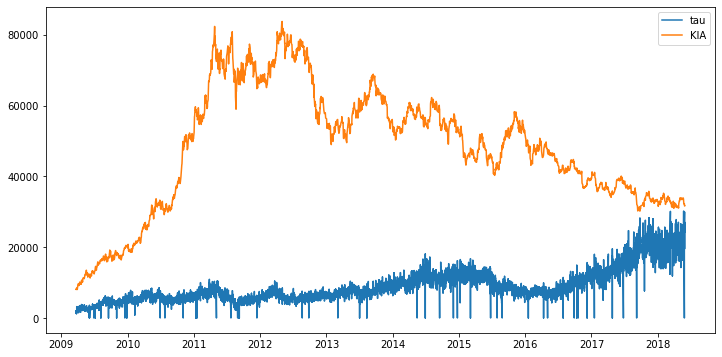

In [73]:
plt.figure(figsize=(12,6))
plt.plot(df['date'],df['tau'])
plt.plot(df_kia['Close'])
plt.legend(['tau', 'KIA'])

In [74]:
df_lastday=df[df['date']=='2018-05-30']

In [75]:
df_lastday

,date,k,fitN,a0,a1,b0,tau
22750,2018-05-30,1,41,-0.909242,0.000047,1.630237,26317.73
22751,2018-05-30,2,37,-0.717859,0.000038,1.179362,24196.48
22752,2018-05-30,3,40,-0.663725,0.000034,1.184611,27001.12
22753,2018-05-30,4,34,-0.557721,0.000030,0.946422,24538.75
22754,2018-05-30,5,33,-0.586936,0.000031,1.003503,25239.68
22755,2018-05-30,6,38,-0.619580,0.000034,1.086507,24645.88
22756,2018-05-30,7,38,-0.557049,0.000030,0.952689,24562.41
22757,2018-05-30,8,39,-0.595521,0.000031,1.025429,24977.92
22758,2018-05-30,9,40,-0.570060,0.000030,0.986699,25263.94
22759,2018-05-30,10,24,-0.619659,0.000033,1.065320,24705.70


In [76]:
df_lastday.shape

(10, 7)

In [77]:
# features of one day : 40
# a0k01 ~ a0k10
# a1k01 ~ a1k10
# b0k01 ~ b0k10
# tau01 ~ tau10
# fb01 ~ fn10

# features of one day : 10x4 = 40

- $a_0 (k)$ : a0k01 ~ a0k10
- $a_1 (k)$ : a1k01 ~ a1k10
- $b_0 (k)$ : b0k01 ~ b0k10
- $\tau(k)$ : tau01 ~ tau10
- $fn(k)$ : fn01 ~ fn10
- $ 1 \le k \le 10 $

# 40 featues show complex dynamics in a day (today) => predict what?
- C1 >< O1 (Close >< Open in today)
- C2 >< O1 (Close in the next day >< Open in today)
- O2 >< C1 (Open in the next day >< Close in today)
- C2 >< C1 (Close in the next day >< Close in today)
- C2 >< O2 (Close >< Open in the next day)
    - O2 >< O1 (Open in the next day >< Open in today)  (deleted)

## Graph of a0,a1,b0,tau along k, $ 1 \le k \le 10 $

In [78]:
df[df['k']==1]['a0'].shape,df[df['k']==1]['date'].shape

((2276,), (2276,))

### a0(k)

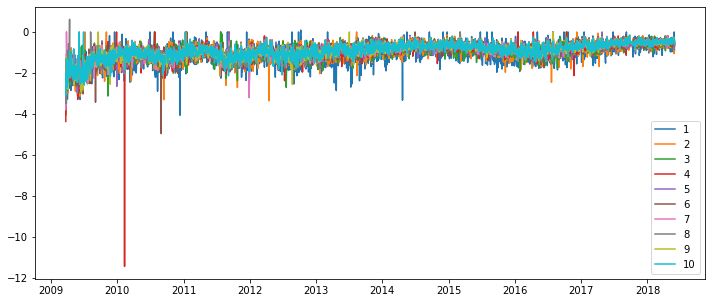

In [79]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a0'])
plt.legend(list(range(1,kf)))
plt.show()

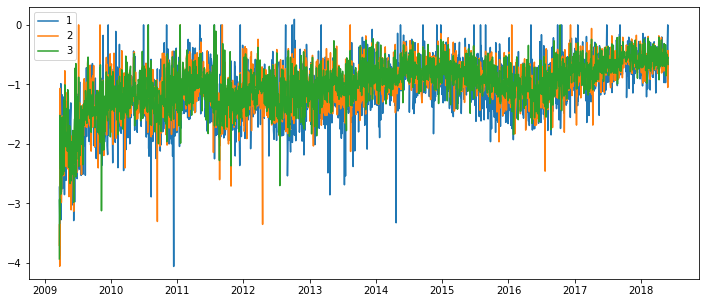

In [80]:
plt.figure(figsize=(12,5))
kf=4
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a0'])
plt.legend(list(range(1,kf)))
plt.show()

In [81]:
# check zeros
print(df[df['a0']==0].shape)
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['a0']==0).astype(int).sum())


(62, 7)
k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


### a1(k)

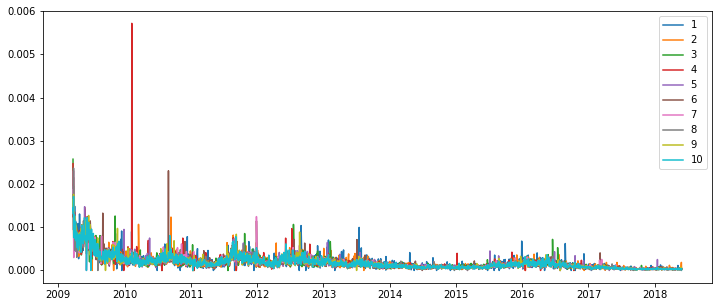

In [82]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a1'])
plt.legend(list(range(1,kf)))
plt.show()

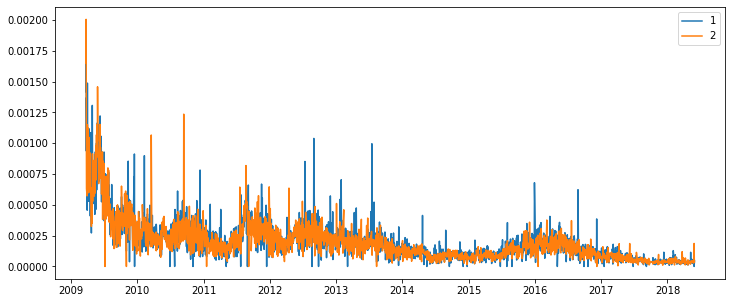

In [83]:
plt.figure(figsize=(12,5))
kf=3
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a1'])
plt.legend(list(range(1,kf)))
plt.show()

In [84]:
# check zeros
df[df['a1']==0].shape
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['a1']==0).astype(int).sum())


k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


### b0(k)

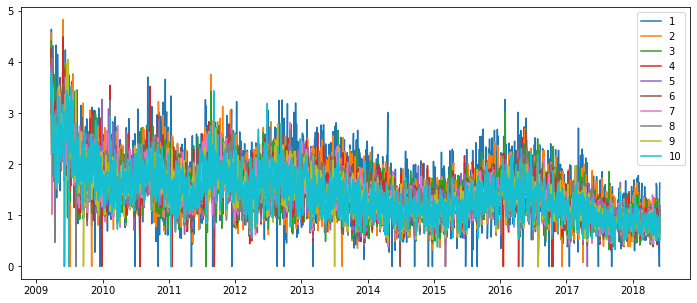

In [85]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['b0'])
plt.legend(list(range(1,kf)))
plt.show()

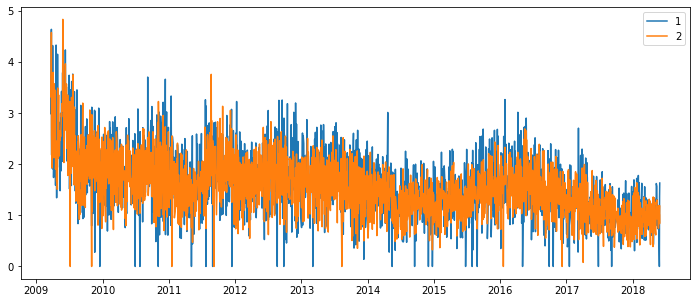

In [86]:
plt.figure(figsize=(12,5))
kf=3
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['b0'])
plt.legend(list(range(1,kf)))
plt.show()

In [87]:
# check zeros
df[df['b0']==0].shape
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['b0']==0).astype(int).sum())


k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


### $\tau (k) $

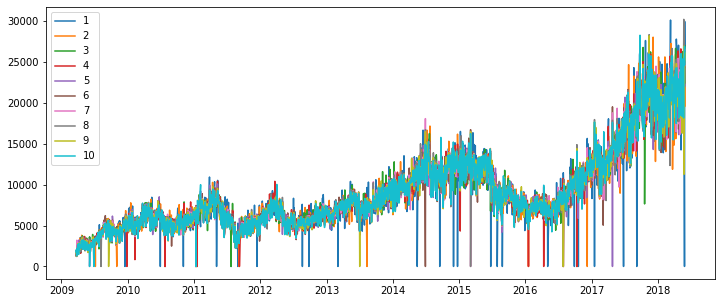

In [88]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['tau'])
plt.legend(list(range(1,kf)))
plt.show()

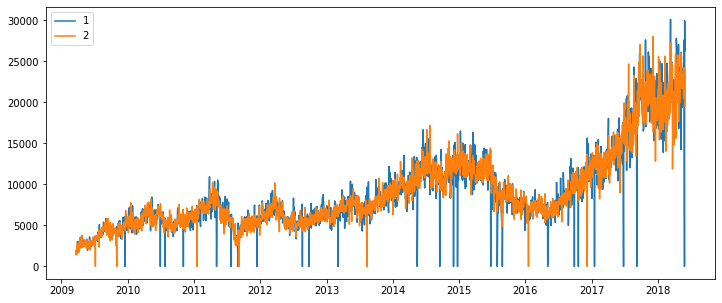

In [89]:
plt.figure(figsize=(12,5))
kf=3
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['tau'])
plt.legend(list(range(1,kf)))
plt.show()

In [90]:
# check zeros
print(df[df['tau']==0].shape)
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['tau']==0).astype(int).sum())

(62, 7)
k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


### fitNumber(k)

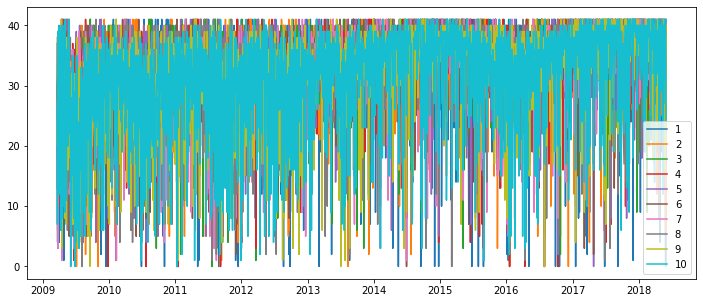

In [91]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['fitN'])
plt.legend(list(range(1,kf)))
plt.show()

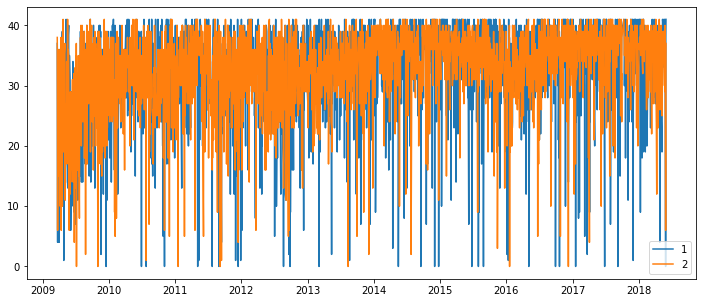

In [92]:
plt.figure(figsize=(12,5))
kf=3
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['fitN'])
plt.legend(list(range(1,kf)))
plt.show()

In [93]:
# check zeros
print(df[df['fitN']==0].shape)
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['fitN']==0).astype(int).sum())

(62, 7)
k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


## Rearrangenent of 40 features
- 10 x 4 => 1 X 40

In [94]:
df_lastday

,date,k,fitN,a0,a1,b0,tau
22750,2018-05-30,1,41,-0.909242,0.000047,1.630237,26317.73
22751,2018-05-30,2,37,-0.717859,0.000038,1.179362,24196.48
22752,2018-05-30,3,40,-0.663725,0.000034,1.184611,27001.12
22753,2018-05-30,4,34,-0.557721,0.000030,0.946422,24538.75
22754,2018-05-30,5,33,-0.586936,0.000031,1.003503,25239.68
22755,2018-05-30,6,38,-0.619580,0.000034,1.086507,24645.88
22756,2018-05-30,7,38,-0.557049,0.000030,0.952689,24562.41
22757,2018-05-30,8,39,-0.595521,0.000031,1.025429,24977.92
22758,2018-05-30,9,40,-0.570060,0.000030,0.986699,25263.94
22759,2018-05-30,10,24,-0.619659,0.000033,1.065320,24705.70


In [95]:
df_lastday.iloc[:,3:]

,a0,a1,b0,tau
22750,-0.909242,0.000047,1.630237,26317.73
22751,-0.717859,0.000038,1.179362,24196.48
22752,-0.663725,0.000034,1.184611,27001.12
22753,-0.557721,0.000030,0.946422,24538.75
22754,-0.586936,0.000031,1.003503,25239.68
22755,-0.619580,0.000034,1.086507,24645.88
22756,-0.557049,0.000030,0.952689,24562.41
22757,-0.595521,0.000031,1.025429,24977.92
22758,-0.570060,0.000030,0.986699,25263.94
22759,-0.619659,0.000033,1.065320,24705.70


In [96]:
df1 = df_lastday.iloc[:,3:].values
df1
# 

array([[-9.092425e-01,  4.726604e-05,  1.630237e+00,  2.631773e+04],
       [-7.178591e-01,  3.804700e-05,  1.179362e+00,  2.419648e+04],
       [-6.637255e-01,  3.351945e-05,  1.184611e+00,  2.700112e+04],
       [-5.577212e-01,  2.978091e-05,  9.464223e-01,  2.453875e+04],
       [-5.869357e-01,  3.069025e-05,  1.003503e+00,  2.523968e+04],
       [-6.195801e-01,  3.381641e-05,  1.086507e+00,  2.464588e+04],
       [-5.570494e-01,  2.988899e-05,  9.526887e-01,  2.456241e+04],
       [-5.955210e-01,  3.142116e-05,  1.025429e+00,  2.497792e+04],
       [-5.700596e-01,  2.989930e-05,  9.866988e-01,  2.526394e+04],
       [-6.196593e-01,  3.303405e-05,  1.065320e+00,  2.470570e+04]])

In [97]:
df.columns[3:],df1.T

(Index(['a0', 'a1', 'b0', 'tau'], dtype='object'),
 array([[-9.092425e-01, -7.178591e-01, -6.637255e-01, -5.577212e-01,
         -5.869357e-01, -6.195801e-01, -5.570494e-01, -5.955210e-01,
         -5.700596e-01, -6.196593e-01],
        [ 4.726604e-05,  3.804700e-05,  3.351945e-05,  2.978091e-05,
          3.069025e-05,  3.381641e-05,  2.988899e-05,  3.142116e-05,
          2.989930e-05,  3.303405e-05],
        [ 1.630237e+00,  1.179362e+00,  1.184611e+00,  9.464223e-01,
          1.003503e+00,  1.086507e+00,  9.526887e-01,  1.025429e+00,
          9.866988e-01,  1.065320e+00],
        [ 2.631773e+04,  2.419648e+04,  2.700112e+04,  2.453875e+04,
          2.523968e+04,  2.464588e+04,  2.456241e+04,  2.497792e+04,
          2.526394e+04,  2.470570e+04]]))

In [98]:
df1.T.reshape(1,-1).shape

(1, 40)

In [99]:
df1.T.reshape(1,-1)

array([[-9.092425e-01, -7.178591e-01, -6.637255e-01, -5.577212e-01,
        -5.869357e-01, -6.195801e-01, -5.570494e-01, -5.955210e-01,
        -5.700596e-01, -6.196593e-01,  4.726604e-05,  3.804700e-05,
         3.351945e-05,  2.978091e-05,  3.069025e-05,  3.381641e-05,
         2.988899e-05,  3.142116e-05,  2.989930e-05,  3.303405e-05,
         1.630237e+00,  1.179362e+00,  1.184611e+00,  9.464223e-01,
         1.003503e+00,  1.086507e+00,  9.526887e-01,  1.025429e+00,
         9.866988e-01,  1.065320e+00,  2.631773e+04,  2.419648e+04,
         2.700112e+04,  2.453875e+04,  2.523968e+04,  2.464588e+04,
         2.456241e+04,  2.497792e+04,  2.526394e+04,  2.470570e+04]])

In [100]:
df.shape,df.iloc[:,3:].shape,df.iloc[:,3:].values.shape


((22760, 7), (22760, 4), (22760, 4))

In [101]:
# ndarray
df.iloc[:,3:].values.T.reshape(1,40,-1).shape

(1, 40, 2276)

In [102]:
df.head(10)

,date,k,fitN,a0,a1,b0,tau
0,2009-03-23,1,37,-2.727038,0.001550,2.984912,1461.122
1,2009-03-23,2,38,-3.703672,0.001828,3.313493,1499.507
2,2009-03-23,3,28,-3.933671,0.002574,4.407811,1292.837
3,2009-03-23,4,13,-4.360880,0.002469,4.251816,1329.968
4,2009-03-23,5,30,-3.669309,0.001936,3.896841,1547.975
5,2009-03-23,6,18,-3.317302,0.001605,3.441775,1681.609
6,2009-03-23,7,25,-3.789300,0.001868,3.772554,1597.517
7,2009-03-23,8,27,-2.920232,0.001748,3.582601,1526.722
8,2009-03-23,9,24,-2.455292,0.001631,3.674260,1628.337
9,2009-03-23,10,27,-2.013126,0.001319,3.246674,1772.121


In [103]:
df['date'].unique()[:5],df['date'].unique()[-5:]

(array(['2009-03-23T00:00:00.000000000', '2009-03-24T00:00:00.000000000',
        '2009-03-25T00:00:00.000000000', '2009-03-26T00:00:00.000000000',
        '2009-03-27T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2018-05-24T00:00:00.000000000', '2018-05-25T00:00:00.000000000',
        '2018-05-28T00:00:00.000000000', '2018-05-29T00:00:00.000000000',
        '2018-05-30T00:00:00.000000000'], dtype='datetime64[ns]'))

In [104]:
dates = df['date'].unique()
dates.shape,type(dates)

((2276,), numpy.ndarray)

In [105]:
df_firstday=df[df['date']==dates[0]]
df_firstday

,date,k,fitN,a0,a1,b0,tau
0,2009-03-23,1,37,-2.727038,0.001550,2.984912,1461.122
1,2009-03-23,2,38,-3.703672,0.001828,3.313493,1499.507
2,2009-03-23,3,28,-3.933671,0.002574,4.407811,1292.837
3,2009-03-23,4,13,-4.360880,0.002469,4.251816,1329.968
4,2009-03-23,5,30,-3.669309,0.001936,3.896841,1547.975
5,2009-03-23,6,18,-3.317302,0.001605,3.441775,1681.609
6,2009-03-23,7,25,-3.789300,0.001868,3.772554,1597.517
7,2009-03-23,8,27,-2.920232,0.001748,3.582601,1526.722
8,2009-03-23,9,24,-2.455292,0.001631,3.674260,1628.337
9,2009-03-23,10,27,-2.013126,0.001319,3.246674,1772.121


In [106]:
df[df['date']==dates[0]].iloc[:,3:].values.T.reshape(1,-1)

array([[-2.727038e+00, -3.703672e+00, -3.933671e+00, -4.360880e+00,
        -3.669309e+00, -3.317302e+00, -3.789300e+00, -2.920232e+00,
        -2.455292e+00, -2.013126e+00,  1.549985e-03,  1.827837e-03,
         2.574144e-03,  2.469195e-03,  1.935527e-03,  1.605084e-03,
         1.867791e-03,  1.747770e-03,  1.630587e-03,  1.319239e-03,
         2.984912e+00,  3.313493e+00,  4.407811e+00,  4.251816e+00,
         3.896841e+00,  3.441775e+00,  3.772554e+00,  3.582601e+00,
         3.674260e+00,  3.246674e+00,  1.461122e+03,  1.499507e+03,
         1.292837e+03,  1.329968e+03,  1.547975e+03,  1.681609e+03,
         1.597517e+03,  1.526722e+03,  1.628337e+03,  1.772121e+03]])

In [107]:
# Arrangement of features
num_features = 40 # 1 x 40
features_array = np.zeros((1, num_features))
for date in dates:
    oneday_features = df[df['date']==date].iloc[:,3:].values.T.reshape(1,-1) # 1 x 40 array
    features_array = np.concatenate((features_array,oneday_features), axis=0)

features_array = features_array[1:][:]
features_array.shape

(2276, 40)

In [108]:
features_array[0],features_array[-1]

(array([-2.727038e+00, -3.703672e+00, -3.933671e+00, -4.360880e+00,
        -3.669309e+00, -3.317302e+00, -3.789300e+00, -2.920232e+00,
        -2.455292e+00, -2.013126e+00,  1.549985e-03,  1.827837e-03,
         2.574144e-03,  2.469195e-03,  1.935527e-03,  1.605084e-03,
         1.867791e-03,  1.747770e-03,  1.630587e-03,  1.319239e-03,
         2.984912e+00,  3.313493e+00,  4.407811e+00,  4.251816e+00,
         3.896841e+00,  3.441775e+00,  3.772554e+00,  3.582601e+00,
         3.674260e+00,  3.246674e+00,  1.461122e+03,  1.499507e+03,
         1.292837e+03,  1.329968e+03,  1.547975e+03,  1.681609e+03,
         1.597517e+03,  1.526722e+03,  1.628337e+03,  1.772121e+03]),
 array([-9.092425e-01, -7.178591e-01, -6.637255e-01, -5.577212e-01,
        -5.869357e-01, -6.195801e-01, -5.570494e-01, -5.955210e-01,
        -5.700596e-01, -6.196593e-01,  4.726604e-05,  3.804700e-05,
         3.351945e-05,  2.978091e-05,  3.069025e-05,  3.381641e-05,
         2.988899e-05,  3.142116e-05,  2.98993

In [109]:
df_kia.shape, features_array.shape

((2276, 6), (2276, 40))

In [110]:
# obj = ["Even" if i%2==0 else "Odd" for i in range(10)]
a0_f = ['a0k0'+ str(i) if i<10 else 'a0k'+ str(i) for i in range(1,11)]
print(a0_f)
a1_f = ['a1k0'+ str(i) if i<10 else 'a1k'+ str(i) for i in range(1,11)]
b0_f = ['b0k0'+ str(i) if i<10 else 'b0k'+ str(i) for i in range(1,11)]
tau_f = ['tauk0'+ str(i) if i<10 else 'tauk'+ str(i) for i in range(1,11)]
feature_columns = a0_f + a1_f + b0_f + tau_f
print(feature_columns)

['a0k01', 'a0k02', 'a0k03', 'a0k04', 'a0k05', 'a0k06', 'a0k07', 'a0k08', 'a0k09', 'a0k10']
['a0k01', 'a0k02', 'a0k03', 'a0k04', 'a0k05', 'a0k06', 'a0k07', 'a0k08', 'a0k09', 'a0k10', 'a1k01', 'a1k02', 'a1k03', 'a1k04', 'a1k05', 'a1k06', 'a1k07', 'a1k08', 'a1k09', 'a1k10', 'b0k01', 'b0k02', 'b0k03', 'b0k04', 'b0k05', 'b0k06', 'b0k07', 'b0k08', 'b0k09', 'b0k10', 'tauk01', 'tauk02', 'tauk03', 'tauk04', 'tauk05', 'tauk06', 'tauk07', 'tauk08', 'tauk09', 'tauk10']


In [111]:
df_kia2 = pd.concat([df_kia, pd.DataFrame(features_array,index=df_kia.index, columns=feature_columns)], axis=1)
df_kia2.shape

(2276, 46)

In [112]:
df_kia2.head()

,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-23,7850,8120,7800,8080,8344058,0.049351,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121
2009-03-24,8240,8260,8010,8180,6652120,0.012376,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118
2009-03-25,8120,8180,7970,8100,5107740,-0.009780,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590
2009-03-26,8170,8480,8110,8420,13682048,0.039506,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662
2009-03-27,8570,9070,8470,8490,16489312,0.008314,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005


# 40 featues show complex dynamics in a day (today) => predict what?
- C1 >< O1 (Close >< Open in today)
- C2 >< O1 (Close in the next day >< Open in today)
- O2 >< C1 (Open in the next day >< Close in today)
- C2 >< C1 (Close in the next day >< Close in today)
- C2 >< O2 (Close >< Open in the next day)
    - O2 >< O1 (Open in the next day >< Open in today)  (deleted)


In [113]:
df_kia.head(6)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-03-23,7850,8120,7800,8080,8344058,0.049351
2009-03-24,8240,8260,8010,8180,6652120,0.012376
2009-03-25,8120,8180,7970,8100,5107740,-0.009780
2009-03-26,8170,8480,8110,8420,13682048,0.039506
2009-03-27,8570,9070,8470,8490,16489312,0.008314
2009-03-30,8570,8720,7900,8050,9338571,-0.051826


In [114]:
c2c1 = [0 if change < 0 else 1 for change in df_kia['Change']]
print(c2c1[:5], len(c2c1))
c1o1 = [0 if change <= 0 else 1 for change in df_kia['Close']-df_kia['Open']]
print(c1o1[:5], len(c1o1))

[1, 1, 0, 1, 1] 2276
[1, 0, 0, 1, 0] 2276


In [115]:
symbol = '000270' # KIA Car
sdate = '2009-03-23' 
edate = '2018-05-31' # 2277 = 2276 + 1(the next day)
df_kia0 = fdr.DataReader(symbol,sdate,edate)
df_kia0.shape

(2277, 6)

In [116]:
c1o1 = [0 if change <= 0 else 1 for change in df_kia['Close'].values-df_kia['Open'].values]
print(c1o1[:5], len(c1o1))

[1, 0, 0, 1, 0] 2276


In [117]:
df_kia0['Close'].values[1:].shape

(2276,)

In [118]:
c2o1 = [0 if change <= 0 else 1 for change in (df_kia0['Close'].values[1:]-df_kia['Open'].values)]
print(c2o1[:5], len(c2o1))

[1, 0, 1, 1, 0] 2276


In [119]:
o2c1 = [0 if change <= 0 else 1 for change in (df_kia0['Open'].values[1:]-df_kia['Close'].values)]
print(o2c1[:5], len(o2c1))

[1, 0, 1, 1, 1] 2276


In [120]:
c2c1 = [0 if change <= 0 else 1 for change in (df_kia0['Close'].values[1:]-df_kia['Close'].values)]
print(c2c1[:5], len(c2c1))

[1, 0, 1, 1, 0] 2276


In [121]:
c2o2 = [0 if change <= 0 else 1 for change in (df_kia0['Close'].values[1:]-df_kia0['Open'].values[1:])]
print(c2o2[:5], len(c2o2))

[0, 0, 1, 0, 0] 2276


In [122]:
type(c2o2)

list

In [123]:
targets = np.array([c1o1,c2o1,o2c1,c2c1,c2o2]).T
targets.shape

(2276, 5)

In [124]:
targets[:10]

array([[1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0]])

In [125]:
# Arrangement of targets
target_columns = ['C1O1','C2O1','O2C1','C2C1','C2O2']
targets_array = np.array([c1o1,c2o1,o2c1,c2c1,c2o2]).T
targets_array.shape

(2276, 5)

In [126]:
df_kia3 = pd.concat([df_kia2, pd.DataFrame(targets_array,index=df_kia2.index, columns=target_columns)], axis=1)
df_kia3.shape

(2276, 51)

In [127]:
df_kia3.head()

,Open,High,Low,Close,Volume,Change,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10,C1O1,C2O1,O2C1,C2C1,C2O2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-23,7850,8120,7800,8080,8344058,0.049351,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121,1,1,1,1,0
2009-03-24,8240,8260,8010,8180,6652120,0.012376,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118,0,0,0,0,0
2009-03-25,8120,8180,7970,8100,5107740,-0.009780,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590,0,1,1,1,1
2009-03-26,8170,8480,8110,8420,13682048,0.039506,-1.300494,-1.856442,-3.267227,-2.730512,-2.687609,-3.435165,-3.552223,-3.506665,-2.362029,-2.341256,0.000936,0.001350,0.001954,0.001735,0.001793,0.002152,0.002307,0.002367,0.001762,0.001711,2.184273,2.576021,3.417829,3.402454,3.396926,3.455015,3.743746,3.993577,3.052707,3.019495,1727.351,1429.803,1353.847,1441.596,1385.083,1231.359,1213.075,1248.435,1258.803,1283.662,1,1,1,1,0
2009-03-27,8570,9070,8470,8490,16489312,0.008314,-2.174669,-1.067556,-1.521173,-1.520366,-2.777781,-1.884196,0.008117,-1.528813,-1.225869,-1.279469,0.001369,0.000632,0.000701,0.000760,0.001281,0.001095,0.000298,0.000988,0.000767,0.000762,2.176573,2.159975,2.257061,2.608248,4.072698,2.605460,1.016953,2.209636,2.228379,2.235360,1671.920,2664.374,2552.312,2545.264,2374.108,1899.040,3208.407,1663.462,2103.401,2129.005,0,0,1,0,0


## Features and targets are completely composed.

In [128]:
# Save data with features and targets in csv file
# df_kia2.to_csv('kia_features.csv') #, index=None)
# df_kia3.to_csv('kia_features_targets.csv') #, index=None)

## Check data with features and targets

In [129]:
df_kia3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2276 entries, 2009-03-23 to 2018-05-30
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2276 non-null   int64  
 1   High    2276 non-null   int64  
 2   Low     2276 non-null   int64  
 3   Close   2276 non-null   int64  
 4   Volume  2276 non-null   int64  
 5   Change  2276 non-null   float64
 6   a0k01   2276 non-null   float64
 7   a0k02   2276 non-null   float64
 8   a0k03   2276 non-null   float64
 9   a0k04   2276 non-null   float64
 10  a0k05   2276 non-null   float64
 11  a0k06   2276 non-null   float64
 12  a0k07   2276 non-null   float64
 13  a0k08   2276 non-null   float64
 14  a0k09   2276 non-null   float64
 15  a0k10   2276 non-null   float64
 16  a1k01   2276 non-null   float64
 17  a1k02   2276 non-null   float64
 18  a1k03   2276 non-null   float64
 19  a1k04   2276 non-null   float64
 20  a1k05   2276 non-null   float64
 21  a1k06   2276 non-nu

In [130]:
df_features=df_kia3.iloc[:,6:46]
df_features.shape

(2276, 40)

In [131]:
(df_features==0).astype(int).sum()

a0k01     25
a0k02      7
a0k03      4
a0k04      9
a0k05      1
a0k06      1
a0k07      4
a0k08      4
a0k09      4
a0k10      3
a1k01     25
a1k02      7
a1k03      4
a1k04      9
a1k05      1
a1k06      1
a1k07      4
a1k08      4
a1k09      4
a1k10      3
b0k01     25
b0k02      7
b0k03      4
b0k04      9
b0k05      1
b0k06      1
b0k07      4
b0k08      4
b0k09      4
b0k10      3
tauk01    25
tauk02     7
tauk03     4
tauk04     9
tauk05     1
tauk06     1
tauk07     4
tauk08     4
tauk09     4
tauk10     3
dtype: int64

In [132]:
df_features[:3]

,a0k01,a0k02,a0k03,a0k04,a0k05,a0k06,a0k07,a0k08,a0k09,a0k10,a1k01,a1k02,a1k03,a1k04,a1k05,a1k06,a1k07,a1k08,a1k09,a1k10,b0k01,b0k02,b0k03,b0k04,b0k05,b0k06,b0k07,b0k08,b0k09,b0k10,tauk01,tauk02,tauk03,tauk04,tauk05,tauk06,tauk07,tauk08,tauk09,tauk10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-23,-2.727038,-3.703672,-3.933671,-4.360880,-3.669309,-3.317302,-3.789300,-2.920232,-2.455292,-2.013126,0.001550,0.001828,0.002574,0.002469,0.001936,0.001605,0.001868,0.001748,0.001631,0.001319,2.984912,3.313493,4.407811,4.251816,3.896841,3.441775,3.772554,3.582601,3.674260,3.246674,1461.122,1499.507,1292.837,1329.968,1547.975,1681.609,1597.517,1526.722,1628.337,1772.121
2009-03-24,-3.122411,-3.348649,-2.933583,-2.821247,-3.108235,-2.540054,-2.970022,-2.841218,-2.774238,-3.082254,0.001416,0.001648,0.001455,0.001291,0.001519,0.001233,0.001463,0.001439,0.001329,0.001453,3.726610,3.733350,3.459047,3.197817,3.748140,3.000958,3.505756,3.389110,3.433971,3.807786,2029.949,1743.483,1813.185,1923.603,1887.045,1857.774,1832.649,1788.894,1965.954,2001.118
2009-03-25,-3.880331,-4.056443,-3.193778,-3.189689,-2.891290,-2.845863,-3.229054,-2.707997,-2.366482,-2.419309,0.001894,0.002004,0.001549,0.001557,0.001381,0.001586,0.001585,0.001478,0.001334,0.001385,4.632692,4.571159,3.624464,3.840120,3.534951,3.847850,3.906032,3.480426,3.133456,3.330892,1886.318,1752.629,1803.177,1882.571,1949.354,1796.506,1879.283,1756.918,1745.643,1774.590


In [133]:
# np.argwhere(arr == 0)
zero_arr = np.argwhere(df_features.values == 0)
zero_arr.shape  # 248 = 62*4

(248, 2)

In [134]:
list(zero_arr[:5])

[array([52,  6]),
 array([52,  9]),
 array([52, 16]),
 array([52, 19]),
 array([52, 26])]

In [140]:
df_features.iloc[52,19]

0.0

##targets
- 'C1O1',	'C2O1',	'O2C1',	'C2C1',	'C2O2'

In [144]:
# target_columns = ['C1O1','C2O1','O2C1','C2C1','C2O2']
df_kia3['C1O1'].value_counts()

0    1243
1    1033
Name: C1O1, dtype: int64

In [151]:
targets_count = []
for target in target_columns:
    cnt = list(df_kia3[target].value_counts())
    targets_count.append(cnt)

targets_count

[[1243, 1033], [1181, 1095], [1140, 1136], [1182, 1094], [1244, 1032]]

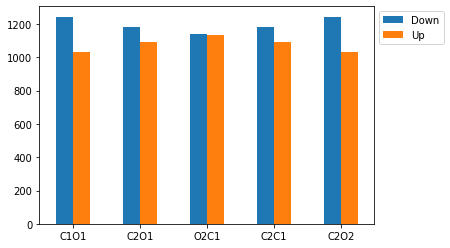

In [166]:
index = np.arange(len(target_columns))
df_target = pd.DataFrame(np.array(targets_count))
df_target.plot.bar()
plt.xticks(index,target_columns, rotation=0)
plt.legend(['Down','Up'], bbox_to_anchor=(1., 1))

### 머신러닝 목표
- 하루의 동역학(40개의 특성)이 무엇을 예측할 수 있는가?
    - 'C1O1', 'C2O1', 'O2C1', 'C2C1', 'C2O2'
